## 1. Import Libraries & Load Data ##

In [1]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv("finance_master.csv")
df.head()

,Transaction_ID,Date,Department,Expense_Category,Region,Payment_Method,Revenue,Expense,Profit,Manager,Employees_Count,Country,Currency
0,1,2025-12-07,Operations,Maintenance,North,Bank Transfer,62725,11294,51431,Karan,55,India,INR
1,2,2025-09-07,HR,Advertising,International,UPI,119057,78206,40851,Amit,53,US,USD
2,3,2025-05-22,HR,Maintenance,International,UPI,86299,42262,44037,Amit,53,US,USD
3,4,2025-06-01,Finance,Advertising,International,UPI,90377,46491,43886,Vikram,49,US,USD
4,5,2025-11-05,R&D,Supplies,International,Bank Transfer,37552,10072,27480,Divya,55,US,USD


## 2. Basic Inspection ##

In [4]:
print("-"*50)
df.info()
print("-"*50)
df.describe()
print("-"*50)
df.isnull().sum()
print("-"*50)
df.shape

--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    2000 non-null   int64         
 1   Date              2000 non-null   datetime64[ns]
 2   Department        2000 non-null   object        
 3   Expense_Category  2000 non-null   object        
 4   Region            2000 non-null   object        
 5   Payment_Method    2000 non-null   object        
 6   Revenue           2000 non-null   int64         
 7   Expense           2000 non-null   int64         
 8   Profit            2000 non-null   int64         
 9   Manager           2000 non-null   object        
 10  Employees_Count   2000 non-null   int64         
 11  Country           2000 non-null   object        
 12  Currency          2000 non-null   object        
 13  Month             2000 non-

(2000, 17)

## 3. Data Cleaning ##

In [3]:
# Convert date
df["Date"] = pd.to_datetime(df["Date"])

# Create Month & Quarter
df["Month"] = df["Date"].dt.month_name()
df["Quarter"] = df["Date"].dt.quarter

# Fill missing numeric values if any
num_cols = ["Revenue", "Expense", "Profit"]
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# Create Profit Margin
df["Profit_Margin(%)"] = round((df["Profit"] / df["Revenue"]) * 100, 2)

# Create Expense Ratio
df["Expense_Ratio(%)"] = round((df["Expense"] / df["Revenue"]) * 100, 2)


## 4. Key Insights (SQL but now in Python) ##

In [5]:
#1.Revenue by department

dept_rev= df.groupby("Department")["Revenue"].sum().sort_values(ascending=False)
dept_rev

Department
Sales          19284148
HR             16675046
Procurement    16480500
IT             16049674
Marketing      16026525
Support        15732736
Legal          14801325
Operations     14557940
Finance        13314861
R&D            12314542
Name: Revenue, dtype: int64

In [6]:
# 2. Profit by Month
month_profit= df.groupby("Month")["Profit"].sum().sort_values(ascending=False)
month_profit

Month
November     9985538
December     8336292
February     8270056
June         8202099
September    7591078
January      7498948
July         7331182
March        7302040
August       7180815
April        6910716
October      6708018
May          6517595
Name: Profit, dtype: int64

In [9]:
#3. Region Performance
region_perf= df.groupby("Region")[["Revenue","Profit","Expense"]].sum().sort_values(by="Profit",ascending=False)
region_perf

,Revenue,Profit,Expense
Region,,,
Online,21330807,13018318,8312489
East,20987658,12811537,8176121
South,20213237,11986160,8227077
Corporate,18842510,11333209,7509301
North,19673848,11260122,8413726
West,18272830,11057352,7215478
International,18915613,10700416,8215197
Central,17000794,9667263,7333531


In [10]:
#4.Top 10 High-Profit Transactions
top10= df.nlargest(10,"Profit")
top10


,Transaction_ID,Date,Department,Expense_Category,Region,Payment_Method,Revenue,Expense,Profit,Manager,Employees_Count,Country,Currency,Month,Quarter,Profit_Margin(%),Expense_Ratio(%)
1799,1800,2025-09-17,Support,Contractors,South,Cash,145085,2470,142615,Kabir,49,India,INR,September,3,98.30,1.70
599,600,2025-06-03,IT,Contractors,International,Cash,147331,5305,142026,Neha,51,US,USD,June,2,96.40,3.60
479,480,2025-06-12,Sales,Software,Online,UPI,146982,5637,141345,Sonia,12,Online,Mixed,June,2,96.16,3.84
408,409,2025-01-19,IT,Travel,West,Card,143423,3875,139548,Neha,51,India,INR,January,1,97.30,2.70
1487,1488,2025-03-20,R&D,Contractors,East,Bank Transfer,145073,6927,138146,Divya,55,India,INR,March,1,95.23,4.77
1643,1644,2025-04-25,Sales,Maintenance,Online,Cash,142965,4861,138104,Sonia,12,Online,Mixed,April,2,96.60,3.40
588,589,2025-01-10,R&D,Maintenance,East,Card,144724,10169,134555,Divya,55,India,INR,January,1,92.97,7.03
635,636,2025-12-19,Operations,Supplies,International,Bank Transfer,144185,9662,134523,Karan,55,US,USD,December,4,93.30,6.70
1586,1587,2025-06-12,Procurement,Maintenance,West,Cash,148879,15052,133827,Tara,45,India,INR,June,2,89.89,10.11
1385,1386,2025-07-02,R&D,Supplies,West,UPI,148849,15497,133352,Divya,55,India,INR,July,3,89.59,10.41


In [11]:
#5. Correlation Matrix
df.corr(numeric_only=True)

,Transaction_ID,Revenue,Expense,Profit,Employees_Count,Quarter,Profit_Margin(%),Expense_Ratio(%)
Transaction_ID,1.000000,0.041267,0.027703,0.030931,0.000958,-0.036980,-0.011461,0.011461
Revenue,0.041267,1.000000,0.622889,0.787678,-0.025340,0.030875,0.114075,-0.114075
Expense,0.027703,0.622889,1.000000,0.008664,-0.018395,0.035637,-0.624343,0.624343
Profit,0.030931,0.787678,0.008664,1.000000,-0.017904,0.011400,0.637496,-0.637496
Employees_Count,0.000958,-0.025340,-0.018395,-0.017904,1.000000,-0.011499,-0.023291,0.023291
Quarter,-0.036980,0.030875,0.035637,0.011400,-0.011499,1.000000,-0.005621,0.005621
Profit_Margin(%),-0.011461,0.114075,-0.624343,0.637496,-0.023291,-0.005621,1.000000,-1.000000
Expense_Ratio(%),0.011461,-0.114075,0.624343,-0.637496,0.023291,0.005621,-1.000000,1.000000


## 5. Visualizations (3–6 plots) ##

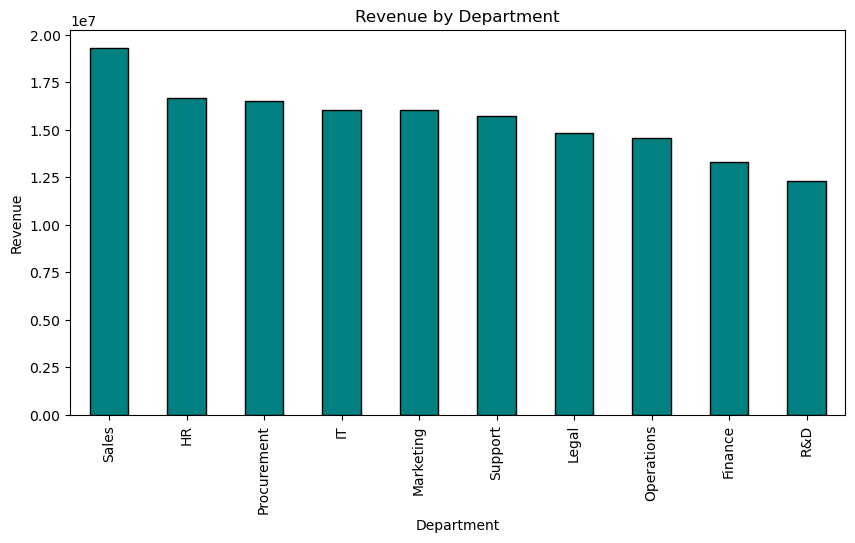

In [14]:
#Bar Chart-- Revenue by department 
plt.figure(figsize=(10,5))
dept_rev.plot(kind="bar",color="teal",edgecolor="black")
plt.title("Revenue by Department")
plt.ylabel("Revenue")
plt.show()



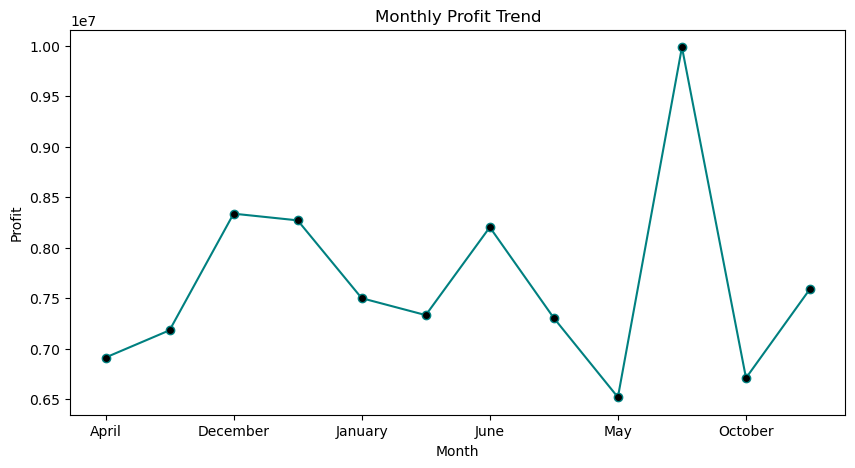

In [15]:
#Line Chart — Monthly Profit Trend
plt.figure(figsize=(10,5))
df.groupby("Month")["Profit"].sum().plot(kind="line",marker="o",color="teal",markerfacecolor="black")
plt.title("Monthly Profit Trend")
plt.ylabel("Profit")
plt.show()

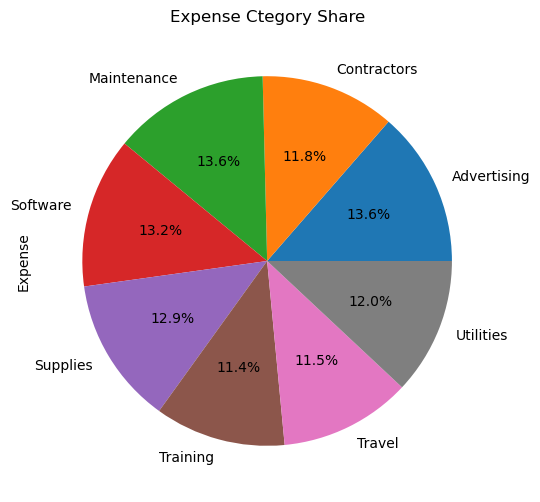

In [16]:
#Pie Chart — Expense Category Share
plt.figure(figsize=(6,6))
df.groupby("Expense_Category")["Expense"].sum().plot(kind="pie",autopct="%1.1f%%")
plt.title("Expense Ctegory Share")
plt.show()

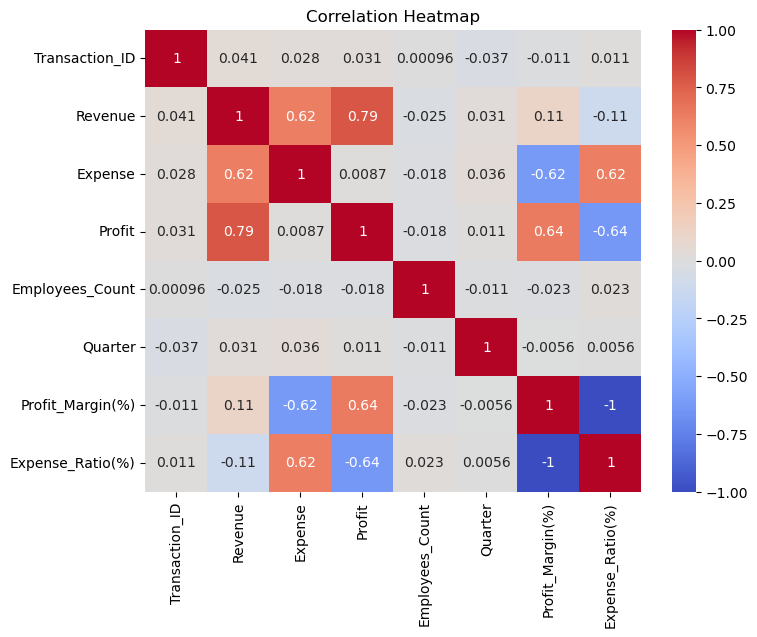

In [17]:
#Heatmap — Correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [18]:
dept_rev.to_csv("department_revenue.csv")
month_profit.to_csv("month_profit.csv")
region_perf.to_csv("region_performance.csv")
top10.to_csv("top10_transactions.csv")

print("CSVs Downloaded")

CSVs Downloaded
